# Visualizing the SPH

In [37]:
import sklearn
from sklearn.decomposition import PCA
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


%matplotlib inline

In [51]:
path = "/home/rozenberszki/Downloads/perf_render/plenoxel_scannet_scene0000_00"
normal_rgb = mpimg.imread(os.path.join(path, 'image000000.jpg'))
sh_loaded = np.load(os.path.join(path,"image000000.npz"))['arr_0']
print(sh_loaded.shape)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data)) * 255

def reducePCA(sh_loaded):
    r_split = sh_loaded[:,:,:9].reshape(124*124, 9)
    g_split = sh_loaded[:,:,9:18].reshape(124*124, 9)
    b_split = sh_loaded[:,:,18:27].reshape(124*124, 9)

    pca = PCA(1)

    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(r_split)
    print(red_transformed.min(), red_transformed.max())
    red_norm = NormalizeData(red_transformed)
    print(red_norm.min(), red_norm.max())
    red_inverted = pca.inverse_transform(red_transformed)
    
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(g_split)
    green_norm = NormalizeData(green_transformed)
    green_inverted = pca.inverse_transform(green_transformed)
    
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(b_split)
    blue_norm = NormalizeData(blue_transformed)
    blue_inverted = pca.inverse_transform(blue_transformed)

    image = (np.dstack((red_norm, green_norm, blue_norm))).astype(np.uint8)
    image = np.squeeze(image)
    image = image.reshape(124,124,3)
    return image

(124, 124, 27)


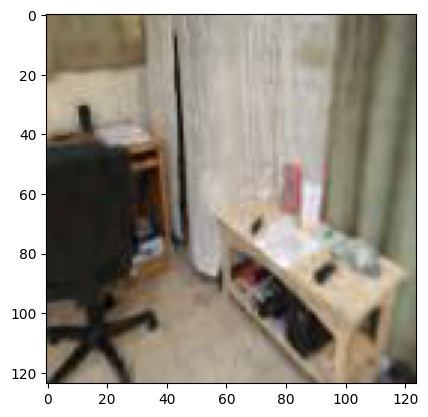

In [52]:
plt.imshow(normal_rgb)

-1.5831288 1.7109935
0.0 255.0


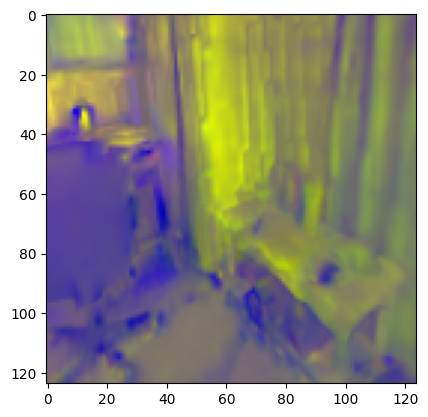

In [53]:
plt.imshow(reducePCA(sh_loaded))

## Sample 2

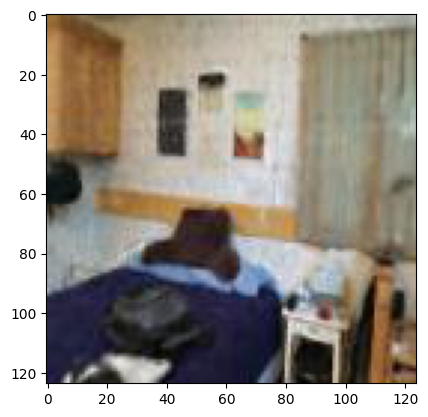

In [56]:
normal_rgb = mpimg.imread(os.path.join(path, 'image000640.jpg'))
sh_loaded = np.load(os.path.join(path,"image000640.npz"))['arr_0']
plt.imshow(normal_rgb)

(124, 124, 27)
-1.1805056 2.0904355
0.0 255.0


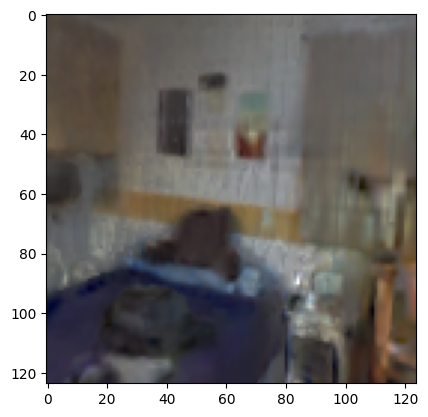

In [58]:
print(sh_loaded.shape)
plt.imshow(reducePCA(sh_loaded))